<a href="https://colab.research.google.com/github/juan46buitrago/ia_2025/blob/main/EDA_TITANIC_arbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/titanic-train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C


1 definir el problema
- caracterizar quienes sobrevivieron a la tragedia del Titanic

-jack se hubiera salvado si rose en la puerta

2.exploracion de datos

*survived: 0=murio, 1=sobrevivio

*pclass: clase de tiquete

*sisbp:#hermanos

*parch:# padres

cabin:# de cabina

embarked: Puerto de embarque	C = Cherburgo, Q = Queenstown, S = Southampton

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
total =df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [ ]:
porcentaje =(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentaje

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


# amalizando los datos con pobabilidad de supervivencia

In [279]:
def bar_char(feature):
  suvived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  test =pd.DataFrame([suvived,dead])
  test.index=["superviventes","fallecimiento"]
  test.plot(kind="bar",stacked=True,figsize=(10,5))

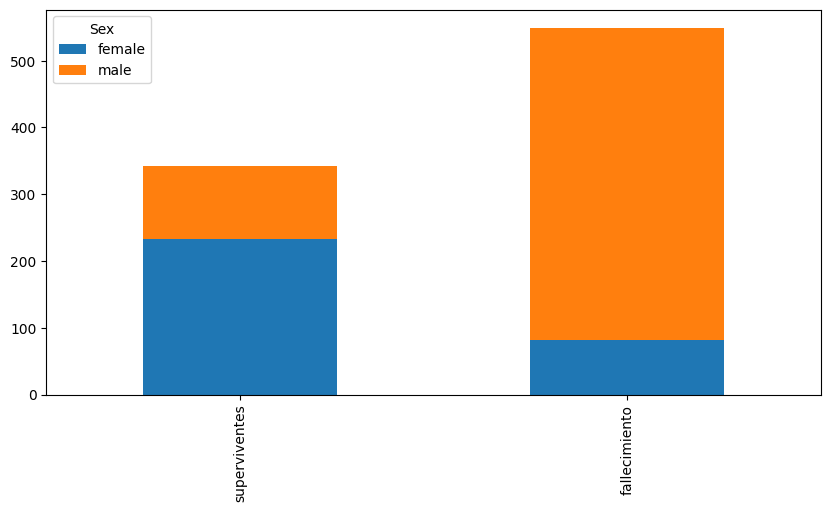

In [280]:
bar_char("Sex")

la grafica señala que las mujeres tuvieron tiene casi 3 veces casi 3 mas probabilidades en el titanic

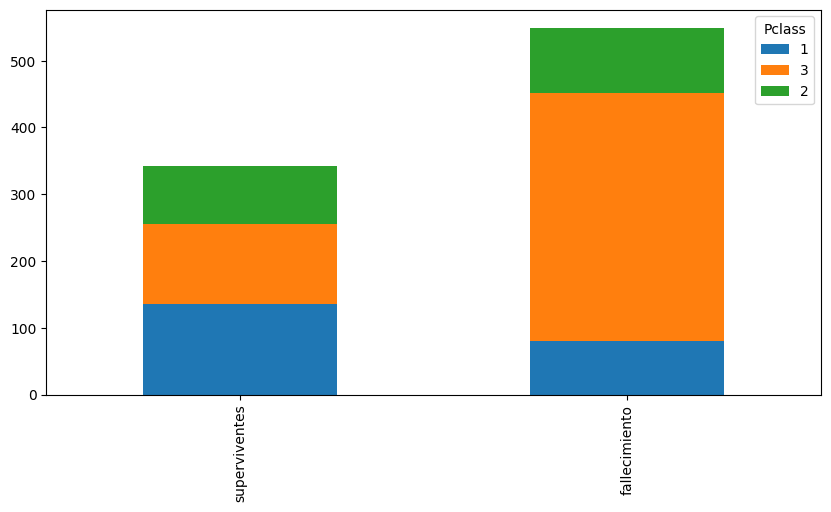

In [ ]:
bar_char("Pclass")

la clase alta tuvo la mayor probabilidad de supervivencia con respecto a **otras clases**
la grafica señala que la clase 3 **fallecia mass**
en comparacion a **otras clases**

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

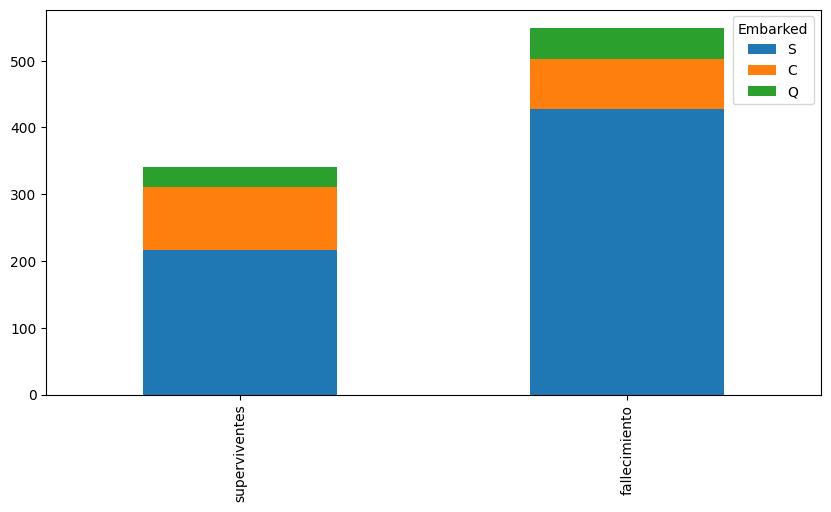

In [ ]:
bar_char("Embarked")

la grafica confirma que
*una persona que **aborda desde c** tuvo una ligera probabildad de sobrevivir

*si una persona que abora**Q y S ** probablemente **murio**

## ingenieria de caracteristicas
es el proceso de usar el dominio de conocimiento para crear nuevas
caraceteristicas(featrue vetor) y que logre que los algoritmos de machine learning funcion corctamente.
featurs vector es un n-dimensional que representa un objeto.muchos algoritmos de ml requiere una representacion numericade los obejors y facilita el procesimiento y el analisis estadistico.

la grafica eñala que una persona casas o con hermaños tiene mas probabilidades de morir

##2. creando nuevos vector features


In [ ]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1131372151.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


In [ ]:
df["Title"]=extract_title(df)
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


### 2.1 crar unmapa dede titulos

se tomara los valores mas representativos
1.mr:0
2.mr:1
3.mr:2
4.mr:3

In [ ]:
def replace_titles(data):
  title_mapping={"Mr":"Señor", "Miss":"Señorita", "Mrs":"Señora"}
  data["Title"]=data["Title"].map(title_mapping).fillna("otros")
  return data

In [ ]:
df=replace_titles(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor


In [ ]:
import pandas as pd

df=pd.read_csv("/content/titanic-train.csv")

def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

df["Title"]=extract_title(df)

def replace_titles(data):
  title_mapping={"Mr":"Señor", "Miss":"Señorita", "Mrs":"Señora"}
  data["Title"]=data["Title"].map(title_mapping).fillna("otros")
  return data

df=replace_titles(df)
df.head()

<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-966266573.py:6: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor


In [ ]:
import pandas as pd

def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

df=pd.read_csv("/content/titanic-train.csv")
df["Title"]=extract_title(df)

def replace_titles(data):
  title_mapping={"Mr":"Señor", "Miss":"Señorita", "Mrs":"Señora"}
  data["Title"]=data["Title"].map(title_mapping).fillna("otros")
  return data

df=replace_titles(df)
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1943384115.py:4: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor


In [ ]:
def classify_age_group(Age):
  if Age<=12:
    return "niño"
  elif 13 <= Age <=19:
    return 'Adolescente'
  elif 20 <= Age <= 35:
    return 'Joven Adulto'
  elif 36 <= Age <= 60:
    return 'Adulto'
  else:
    return 'Adulto Mayor'

df['Age_Group'] = df['Age'].apply(classify_age_group)
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor,Joven Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita,Joven Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora,Joven Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor,Joven Adulto


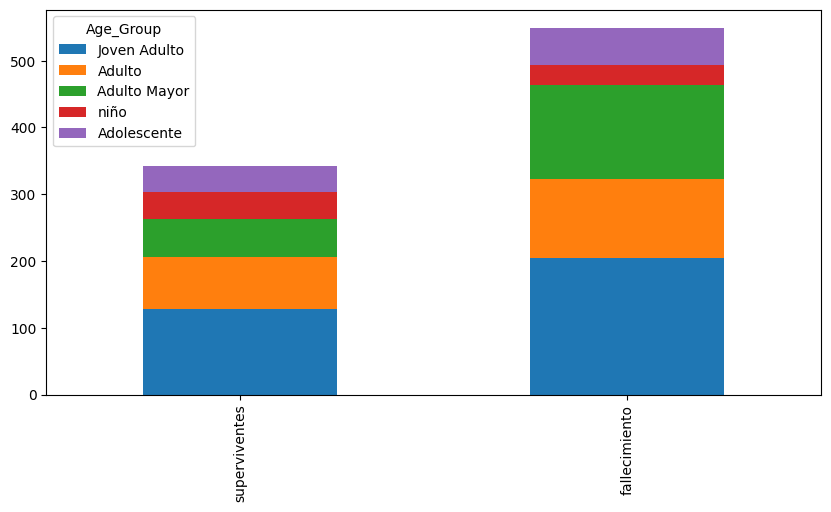

In [ ]:
bar_char("Age_Group")

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


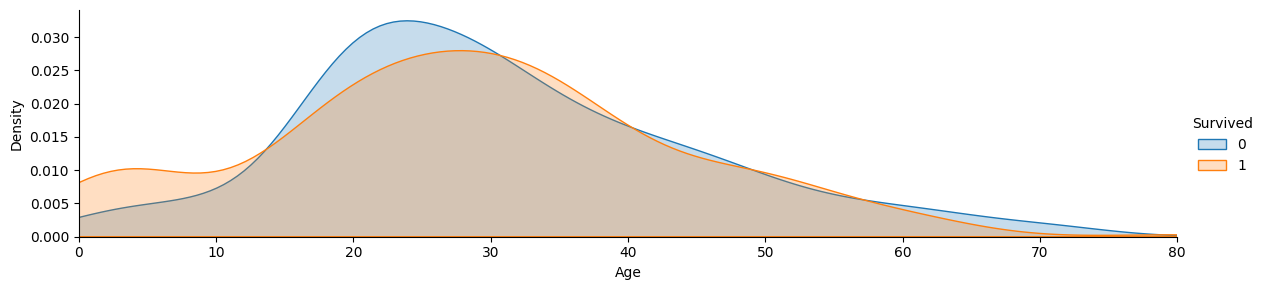

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.show()

(20.0, 40.0)

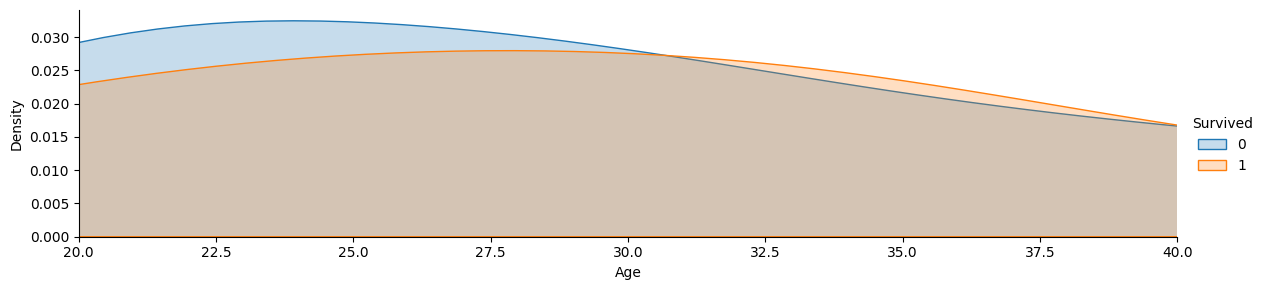

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()
plt.xlim(20,40)

## 4.2 Binning

convertit una variable numeria a categoria

mapeo de featura vector

child=0
young=1
adult=2
mid.age:3
senior:4

In [ ]:
df.loc[df['Age'] <= 12, 'Age'] = 0
df.loc[(df['Age'] > 12) & (df['Age'] <= 18), 'Age'] = 1
df.loc[(df['Age'] > 18) & (df['Age'] <= 35), 'Age'] = 2
df.loc[(df['Age'] > 35) & (df['Age'] <= 60), 'Age'] = 3
df.loc[df["Age"] > 60, "Age"] = 4

In [ ]:
display(df.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  Age_Group    891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [ ]:
#tratamiento de datos
import pandas as pd
import numpy as np

#visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
#modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, roc_auc_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [281]:
df = df[[ 'Survived', 'Pclass', 'Sex', 'Age',
         'Age_Group',]]
df.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,2.043417
std,0.486592,0.836071,0.938243
min,0.000000,1.000000,0.000000
25%,0.000000,2.000000,2.000000
50%,0.000000,3.000000,2.000000
75%,1.000000,3.000000,3.000000
max,1.000000,3.000000,4.000000


In [282]:


X = df.drop(columns="Survived")
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1279)

In [ ]:
X_train.shape

(623, 4)

In [292]:
modelos_ar=DecisionTreeClassifier(max_depth=6,random_state=2022)

In [293]:
modelos_ar.fit(X_train, y_train)

print(f"profundidad del arbol: {modelos_ar.get_depth()}")
print(f"numero de nodos terminales: {modelos_ar.get_n_leaves()}")

profundidad del arbol: 6
numero de nodos terminales: 23


In [294]:
y_pred = modelos_ar.predict(X_test)
# For a classification report, we need integer predictions
y_pred_classified = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_classified))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       176
           1       0.75      0.67      0.71        92

    accuracy                           0.81       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.81      0.81      0.81       268



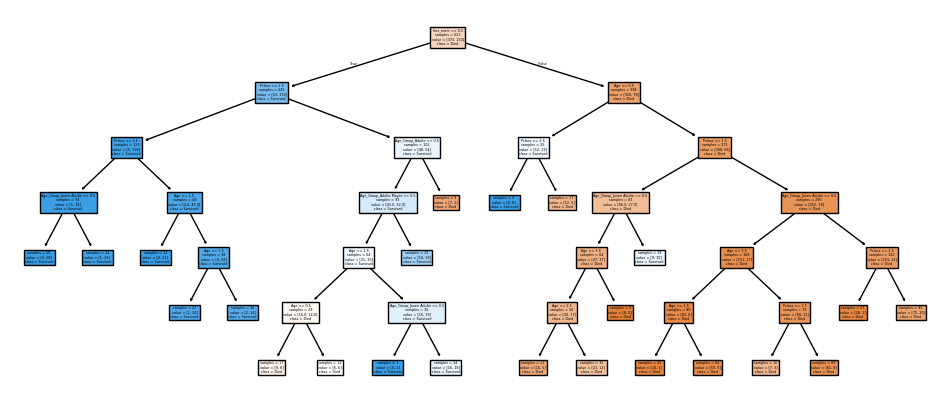

In [297]:
fig,ax=plt.subplots(figsize=(12,5))
plot=plot_tree(
    decision_tree=modelos_ar,
    feature_names=X_train.columns,
    filled=True,
    impurity=False,
    precision=2,
    ax=ax,
    class_names=['Died', 'Survived']
)